# Step 1: Reading and Understanding the Data

In [71]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [73]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [74]:
# Read the data from csv file
df_bike = pd.read_csv('day.csv')

In [75]:
# Check the head of the dataset
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
# checking the shape of dataframe
df_bike.shape

(730, 16)

In [77]:
# describing the columns of dataframe
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Renaming few columns for better readibility

In [78]:
df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [79]:
# get the info about columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [80]:
# checking for the null values in column data
df_bike.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step 2: Preprocessing

In [81]:
# Copying the dataframe into new
df_bike_clean = df_bike.copy()
df_bike_clean.shape

(730, 16)

In [82]:
# dropping the duplicates
df_bike_clean.drop_duplicates(inplace=True)
df_bike_clean.shape

(730, 16)

##### There was no duplicates in the data.

### Dropping the unwanted columns
- instant has only index for the row, dteday has date which can be compensated by year and month column,
- casual and registered seems to be the breakup by category for cnt column.

In [83]:
drop_these_columns = ['instant','dteday','casual','registered']
df_bike_clean.drop(drop_these_columns, inplace=True, axis=1)
df_bike_clean.shape

(730, 12)

### Map All Non-binary Categorical Columns to their Orignal Values

In [84]:
# Encoding/mapping the season column
df_bike_clean.season = df_bike_clean.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column
df_bike_clean.month = df_bike_clean.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column
df_bike_clean.weekday = df_bike_clean.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column
df_bike_clean.weathersit = df_bike_clean.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# check the head of the dataset
df_bike_clean.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [85]:
# check the column info of the dataset
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


# Step 3: Exploratory Data Analysis (EDA)

#### Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

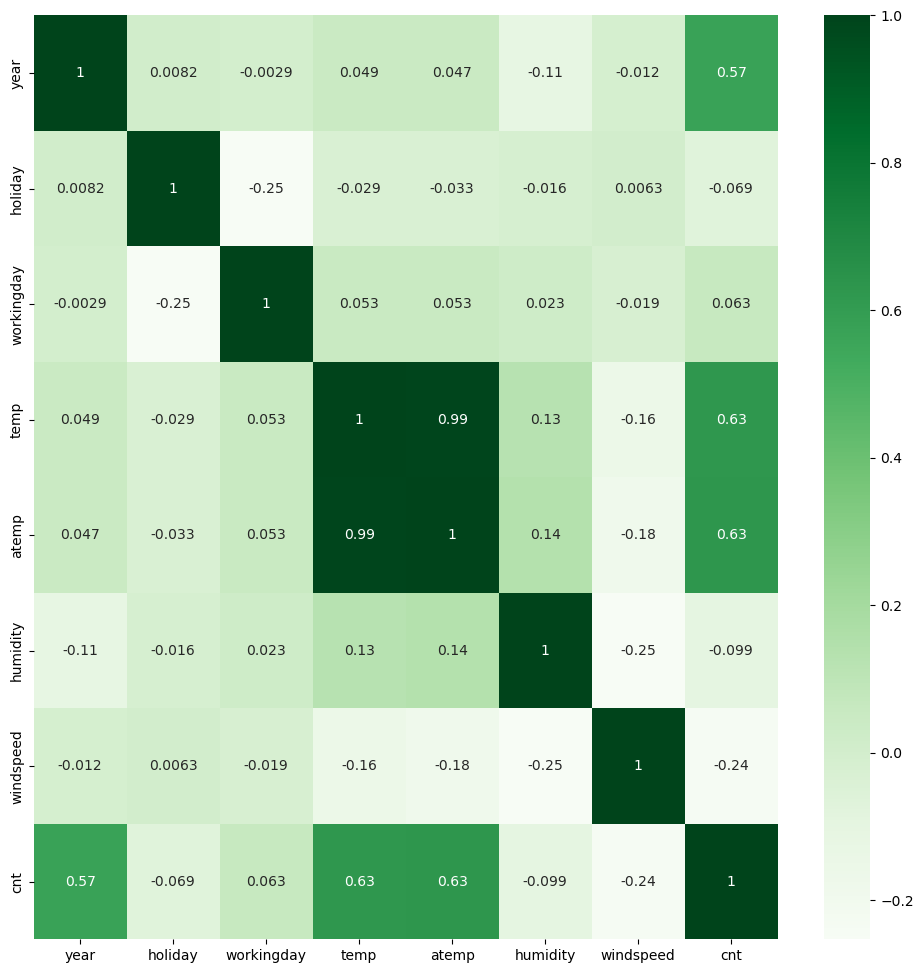

In [86]:
plt.figure(figsize = (12, 12))
sns.heatmap(df_bike_clean.corr(),cmap="Greens",annot=True)
plt.show()

#### Observation from above HeatMap
1. atemp is having highest correlation coefficient with cnt followed by temp.
2. season is correlated with cnt. correlation coefficeint is decent. Neither too high nor too low.
3. yr is also corrleated with cnt. It can be a contributing factor.
4. mnth correlation coefficient is on low side. We need to check this statistically. It might be the case that only few months are statistically significant from model perspective.
5. Holiday is negatively correlated with cnt.
6. Similarly need to check the statistical significance for weekday, workingday, weathersit, hum and windspeed. 

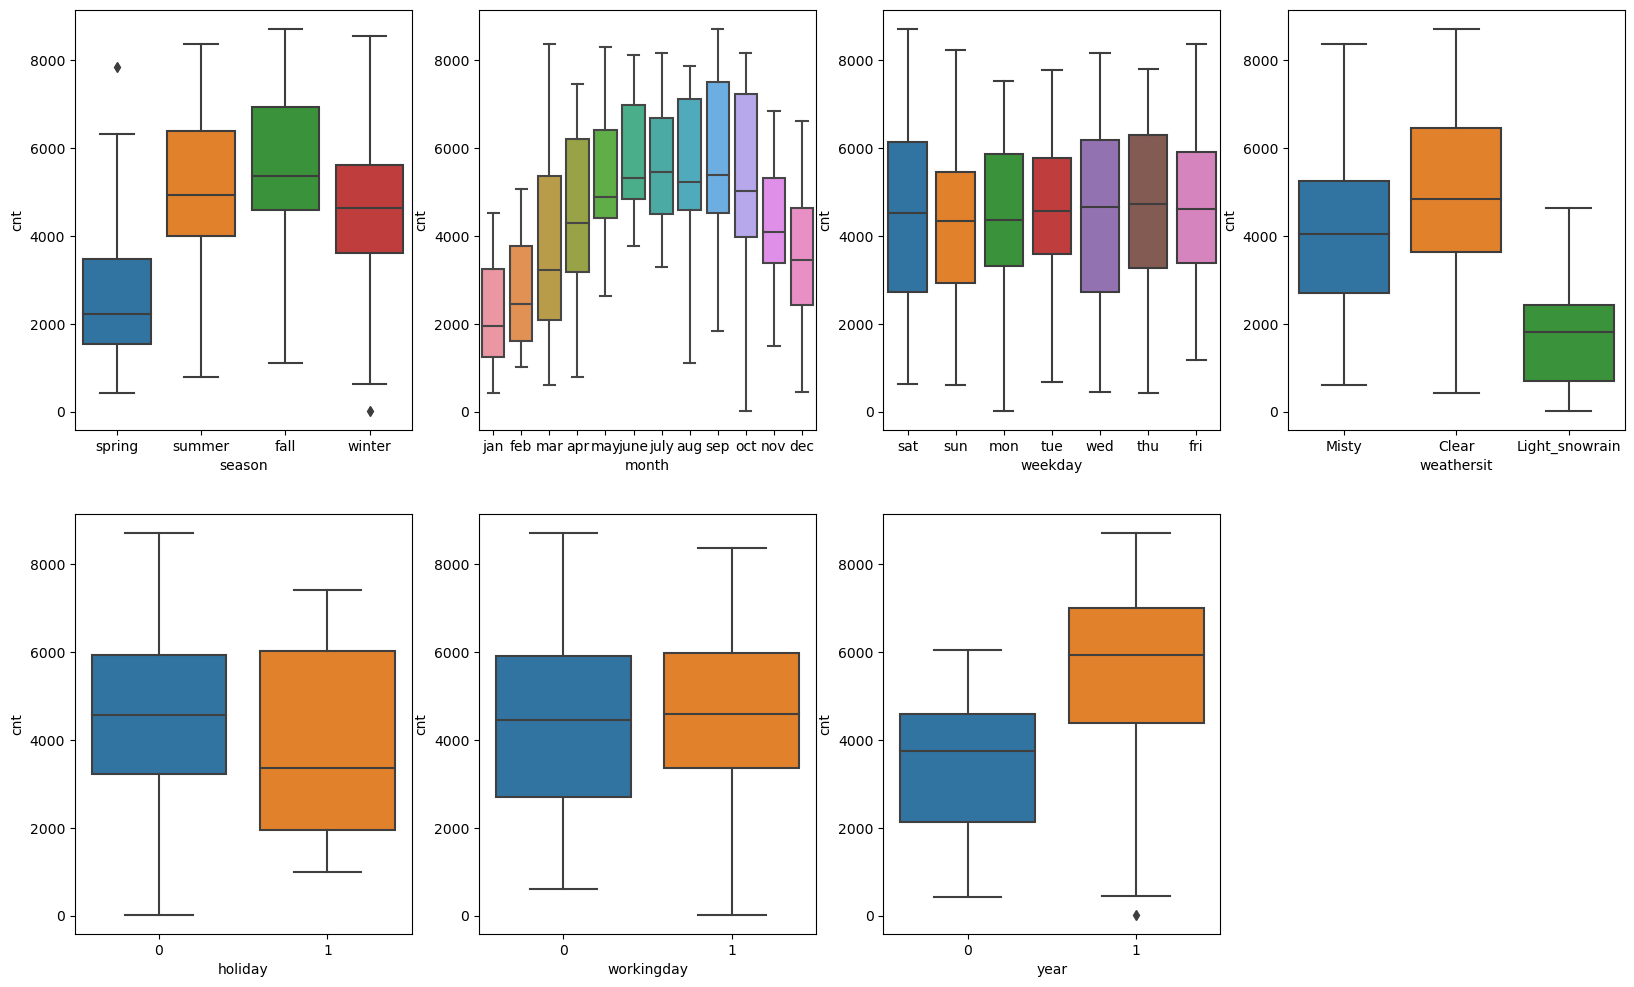

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_clean)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike_clean)
plt.show()

##### Observations from above box Plots:
1. Median of bike rental count is highest for fall season. Need to check the statistical significance of this.
2. Also maximum bike rental count is for fall season.
3. Median of bike rental count is highest for year 2019. Also maximum bike rental count is for year 2019.
4. Highest bike rental count is in September.
5. Median of bike rental count is highest for July.
6. Lowest bike rental count is for October.
7. Median and highest bike rental count is for no holiday days marked with 0.
8. Bike rental median for all days are almost close to each other.
9. Bike rental median for working/non-working days are almost close to each other.

#### Function to create barplot related to categorical columns

In [88]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x= column,y= 'cnt',data=df_bike_clean)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y= 'cnt',data=df_bike_clean, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

##### plotting visualization for season column

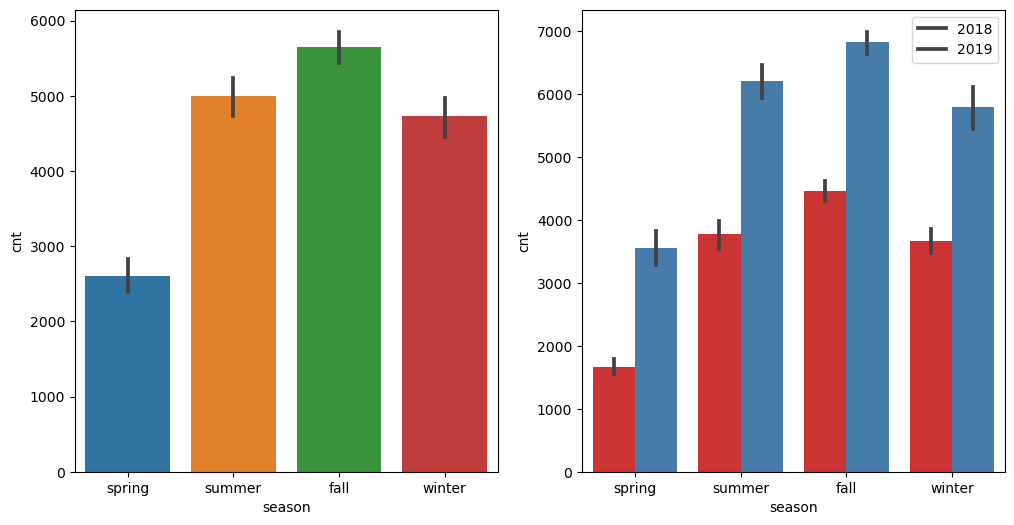

In [89]:
plot_cat_columns('season')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

#### Plotting visualization for weekday column


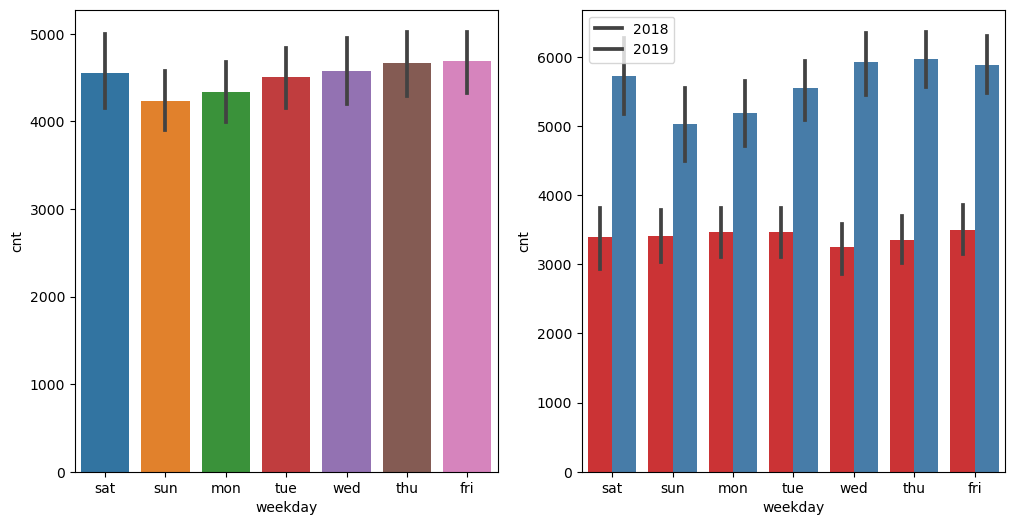

In [90]:
plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

#### plotting visualization for holiday column

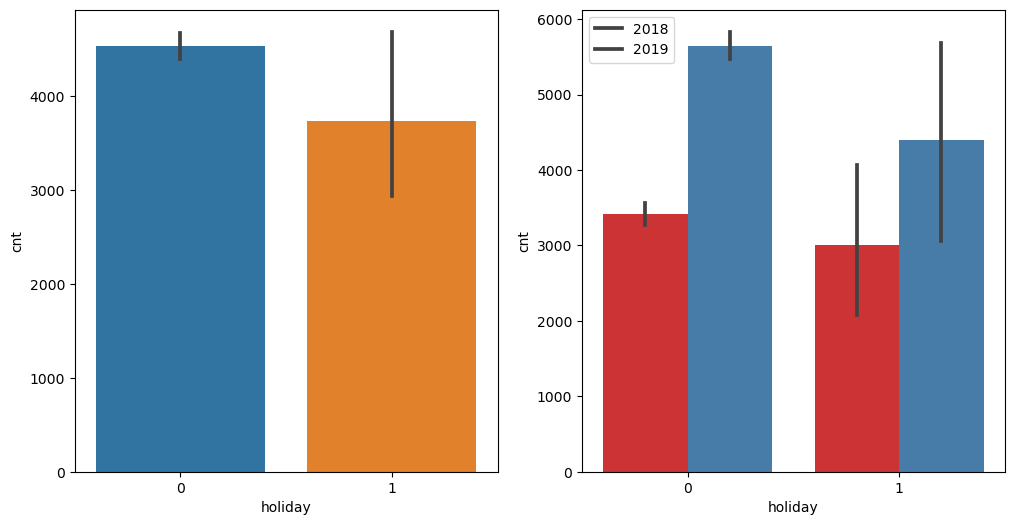

In [91]:
plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

#### Plotting visualization for workingday column

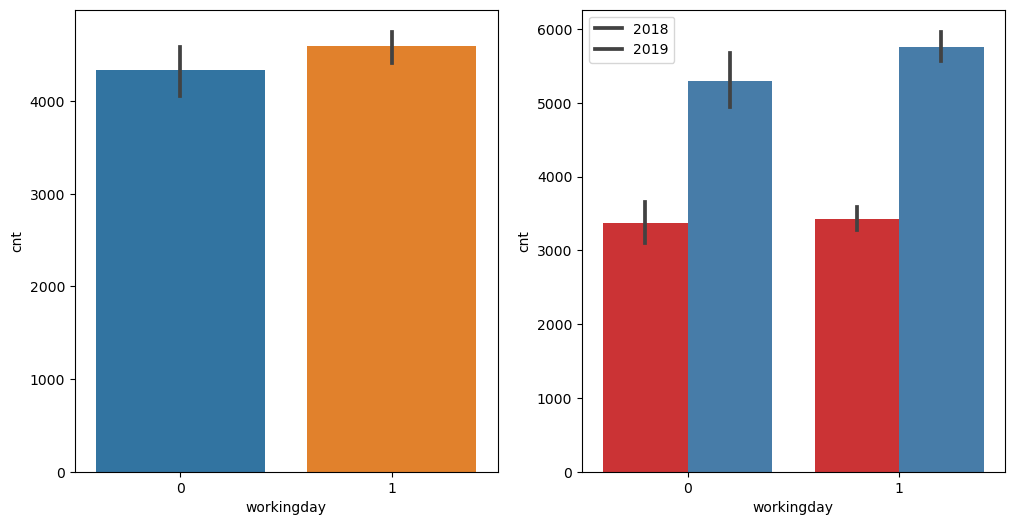

In [92]:
plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

#### Analysing/visualizing the numerical columns

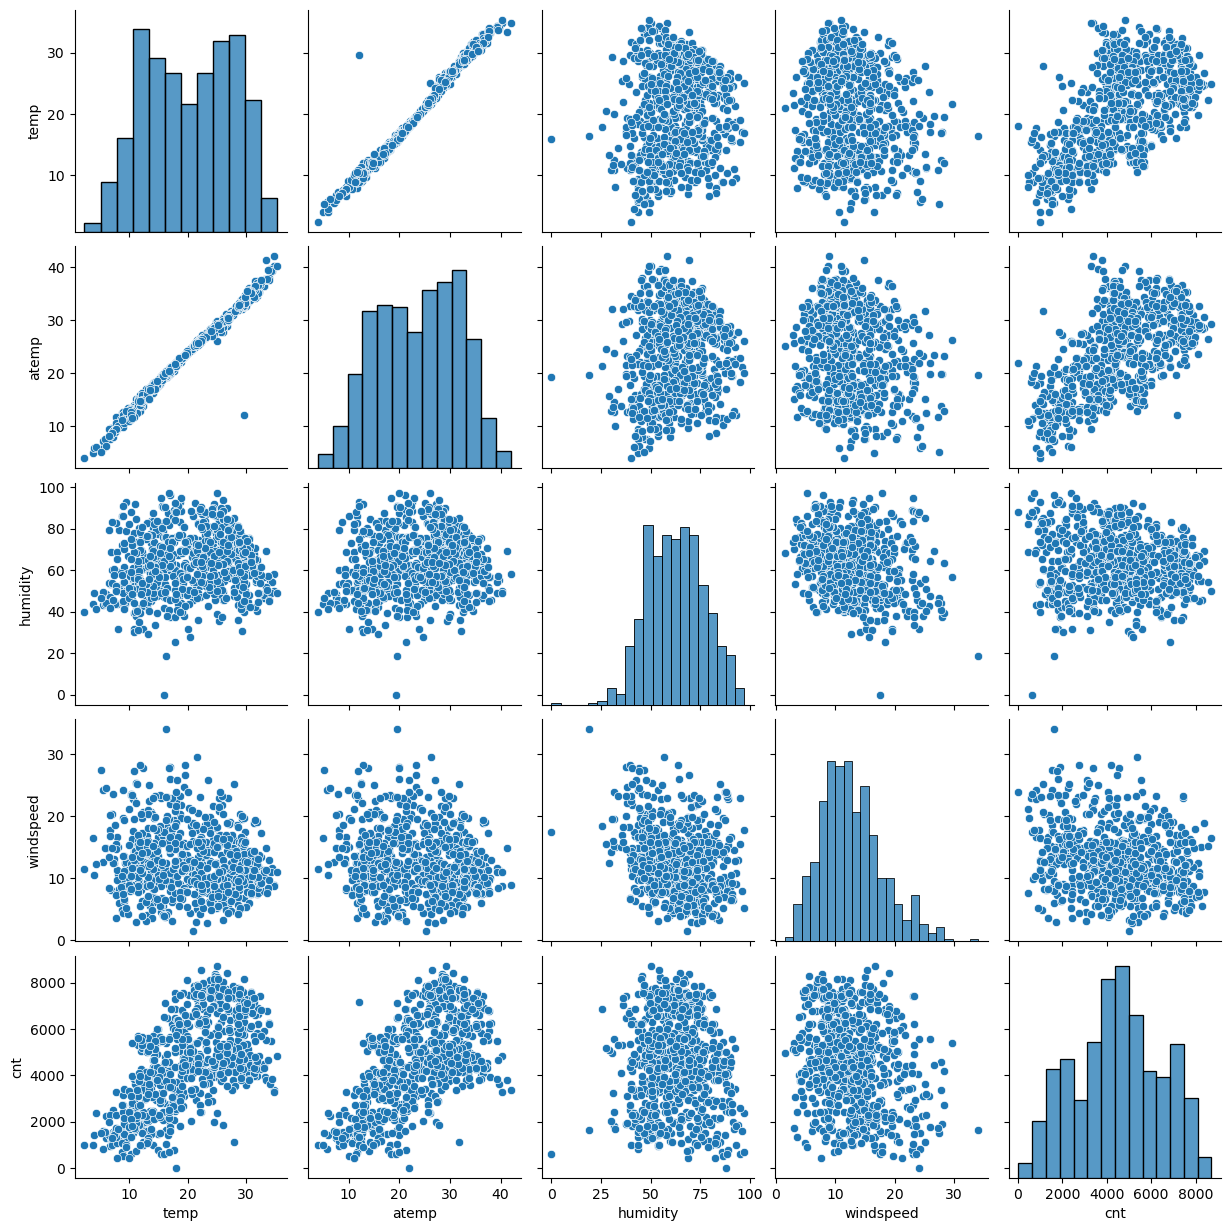

In [93]:
sns.pairplot(data=df_bike_clean,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 4: Create Dummy Columns for all non-binary Categorical Variables

In [94]:
months_df=pd.get_dummies(df_bike_clean.month,drop_first=True)
weekdays_df=pd.get_dummies(df_bike_clean.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df_bike_clean.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df_bike_clean.season,drop_first=True)

In [95]:
# Merging  the dataframe, with the dummy variable dataset. 
df_bike_dummies = pd.concat([df_bike_clean,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_bike_dummies.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


##### Dropping unnecessary columns as we have already created dummy variable out of it.


In [96]:
df_bike_dummies.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df_bike_dummies.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [97]:
# check the column info of new dataframe 
df_bike_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Step 5: Splitting the Data into Training and Testing Sets

In [98]:
np.random.seed(0)
df_bike_train, df_bike_test = train_test_split(df_bike_dummies, train_size = 0.7, random_state = 100)

In [99]:
# check the shape of training datatset
df_bike_train.shape

(510, 30)

In [100]:
# check the shape of testing datatset
df_bike_test.shape

(220, 30)

In [101]:
df_bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Step 6: Apply Scaling to Non-binary and Dummy columns

In [102]:
scaler = MinMaxScaler()

#### Apply Scaling to all columns except the binary and 'dummy' variables

In [103]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])
df_bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [104]:
df_bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 7: Feature Selection and Modeling

#### Divide Training dataset into X and Y sets for the model building

In [105]:
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train ## assigning all feature variables to X_train

### RFE (Recursive Feature Elimination)

In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10) # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 3),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', False, 2),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 3),
 ('tue', False, 3),
 ('wed', False, 3),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

#### variables suggested by RFE

In [107]:
col = X_train.columns[rfe.support_] 
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')

#### variables rejected by RFE

In [108]:
X_train.columns[~rfe.support_] 

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics. We are assuming significance level of 0.05

In [109]:
# Calculate the VIFs for the new model
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

#### Model 1 

In [110]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the 1st linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.64e-187
Time:                        00:35:06   Log-Likelihood:                 508.34
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     495   BIC:                            -923.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3512      0.032     11.

Looking at the p-values, it looks like holiday variable is not really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

##### Checking VIF

In [111]:
calculate_VIF(col,X_train)

,Features,VIF
3,humidity,24.27
2,temp,16.56
4,windspeed,4.07
12,spring,2.94
11,Misty,2.25
13,winter,2.22
0,year,2.07
6,jan,1.73
7,july,1.41
5,dec,1.35


As humidity shows high VIF values hence we can drop it.

In [112]:
X_train_new = X_train_rfe[col].drop(['humidity'], axis = 1)
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.04
11,spring,2.36
0,year,2.06
5,jan,1.64
12,winter,1.64
10,Misty,1.54
6,july,1.36
4,dec,1.29
7,sep,1.20


VIF values seems to be good now. But we will see if we can reduce further.

#### Model 2

In [113]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.61e-185
Time:                        00:35:07   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     496   BIC:                            -914.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2752      0.025     10.

We can drop sat variable as it has high p-value

In [114]:
X_train_new = X_train_new.drop(['sat'], axis = 1)

##### Recalculate VIF

In [115]:

calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
10,spring,2.36
0,year,2.06
5,jan,1.64
11,winter,1.64
9,Misty,1.54
6,july,1.36
4,dec,1.29
7,sep,1.20


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

#### Model 3

In [116]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          5.72e-186
Time:                        00:35:07   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2780      0.025     11.

We can drop dec variable as it has high p-value

In [117]:
X_train_new = X_train_new.drop(['dec'], axis = 1)

##### Recaluclate VIF

In [118]:
calculate_VIF(X_train_new.columns,X_train_new)


,Features,VIF
2,temp,4.63
3,windspeed,4.01
9,spring,2.24
0,year,2.06
4,jan,1.60
8,Misty,1.53
10,winter,1.39
5,july,1.36
6,sep,1.20
7,Light_snowrain,1.08


#### Model 4

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [119]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          2.87e-186
Time:                        00:35:08   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2671      0.025     10.

We can drop jan variable as it has high p-value

In [120]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

##### Recaluclate VIF

In [121]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,year,2.06
8,spring,1.64
7,Misty,1.52
9,winter,1.39
4,july,1.35
5,sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

#### Model 5

In [122]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          3.10e-186
Time:                        00:35:08   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2531      0.024     10.

We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 247.5 (which is greater than 1) and the p-value of 3.10e-186 i.e almost equals to zero, states that the overall model is significant

#### Checking the parameters and their coefficient values

In [123]:
lr_5.params

const             0.253133
year              0.234244
holiday          -0.098014
temp              0.449789
windspeed        -0.139510
july             -0.072935
sep               0.057311
Light_snowrain   -0.285463
Misty            -0.079650
spring           -0.112286
winter            0.044893
dtype: float64

# Step 8: Residual Analysis of the train data and validation

In [124]:
X_train_lm_5.head()

,const,year,holiday,temp,windspeed,july,sep,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,0


We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).

In [125]:
#  Predict the lm_5 model
y_train_cnt = lr_5.predict(X_train_lm_5)

Check for Root Mean Sqaure Error (RMSE)


In [126]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09183948660631576

#### Plot the histogram of the error terms

Text(0.5, 0, 'Errors')

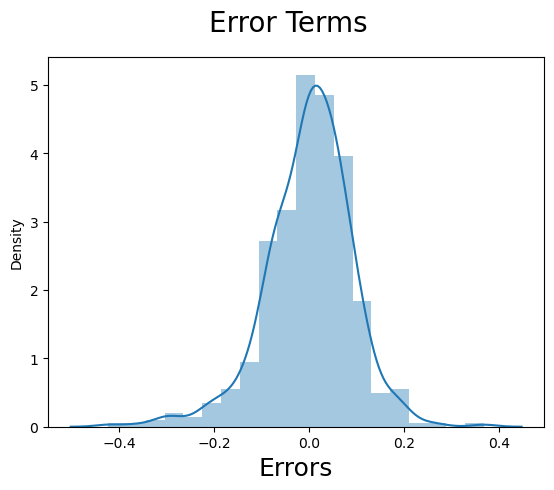

In [127]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)           
plt.xlabel('Errors', fontsize = 18) 

The residuals are following the normally distributed with a mean 0. All good!

#### Check for Linearity

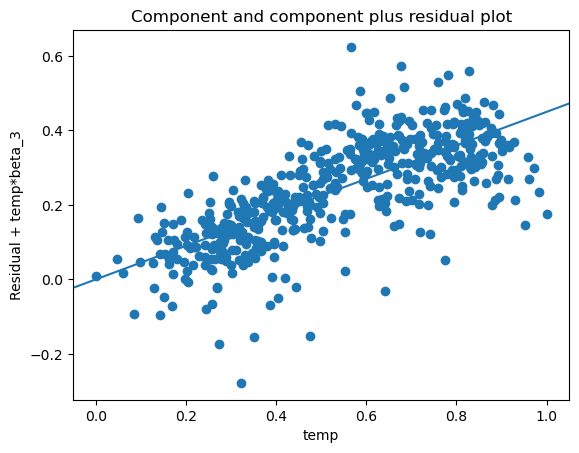

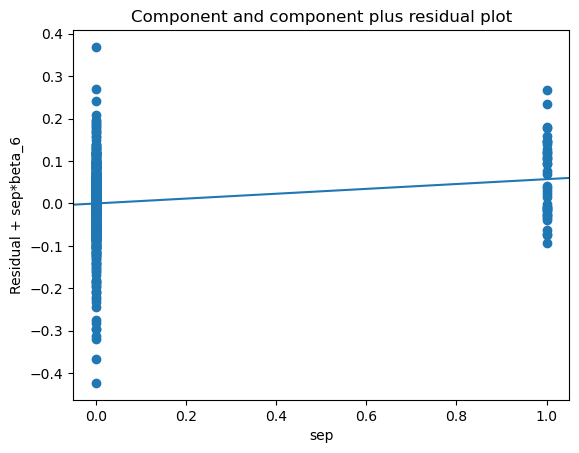

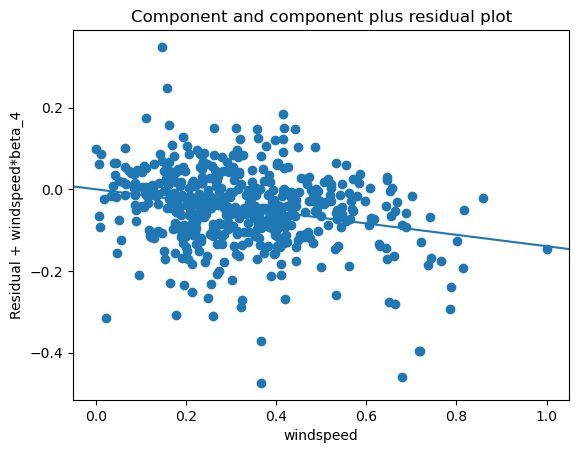

In [128]:
sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Looking for patterns in the residuals

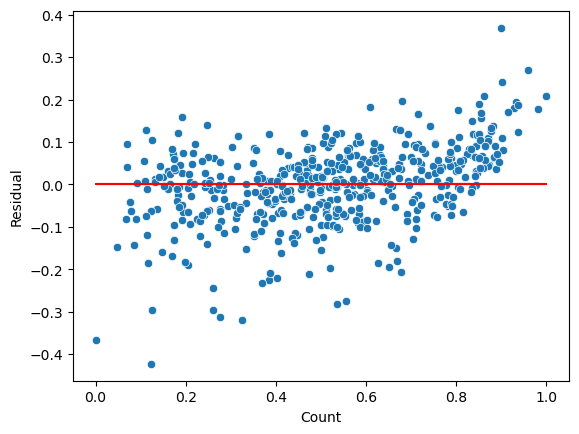

In [129]:
residual = y_train - y_train_cnt
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

We are sure that the model fit has decent predictive power. The normality of residual terms allows some inference on the coefficients.

# Step 9: Predictions Using the Final Model

We need to follow the exact same steps for data preparation as we did for training datasets.

#### Applying scaling on the test dataset

In [130]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_bike_test[num_vars] = scaler.transform(df_bike_test[num_vars])
df_bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [131]:
df_bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Divide Testing dataset into X and Y sets for the model building

In [132]:
y_test = df_bike_test.pop('cnt')
X_test = df_bike_test

In [133]:
col_test = X_train_new.columns
X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)


##### Predict Results

In [134]:
y_pred = lr_5.predict(X_test_lm_5)

# Step 10: Model Evaluation

##### Get R2 Score for the predicted result

In [135]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8075

In [136]:
lr_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          3.10e-186
Time:                        00:35:12   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2531      0.024     10.569      0.000       0.206       0.300
year               0.2342      0.008     28.210      0.000       0.218       0.251
holiday           -0.0980      0.026     -3.727      0.000      -0.150      -0.046
temp               0.4498      0.031     14.686      0.000       0.390       0.510
windspeed         -0.1395      0.025     -5.540      0.000      -0.189      -0.090
july              -0.0729      0.018     -4.167      0.000      -0.107      -0.039
sep                0.0573      0.016      3.606      0.000       0.026       0.089
Light_snowrain    -0.2855      0.025    -11.445      0.000      -0.334      -0.236
Misty             -0.0796      0.009     -9.014      0.000      -0.097      -0.062
spring            -0.1123      0.015     -7.360      0.000      -0.142      -0.082
winter             0.0449      0.012      3.602      0.000       0.020       0.069
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.692
Skew:                          -0.599   Prob(JB):                     2.08e-30
Kurtosis:                       5.235   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

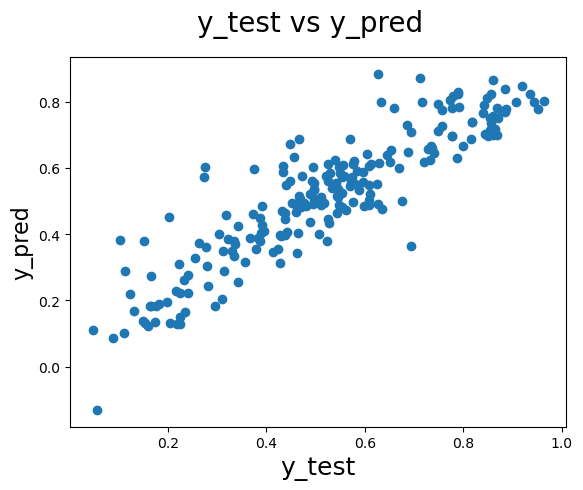

In [137]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

Check for Root Mean Sqaure Error (RMSE)


In [138]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09594203948912745

#### Calculating Adjusted-R^2 value for the test dataset

In [139]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7983


The equation of our best fitted line is:

cnt =  0.2531 + 0.2342 X  year - 0.0980  X  holiday + 0.4498 X temp - 0.1395 X windspeed - 0.0729 X july + 0.0573 X sep - 0.2855 X Light_snowrain - 0.0796 X Misty - 0.1123 X spring + 0.0449 X winter

##### Visualizing the fit on the test data by plotting a Regression plot

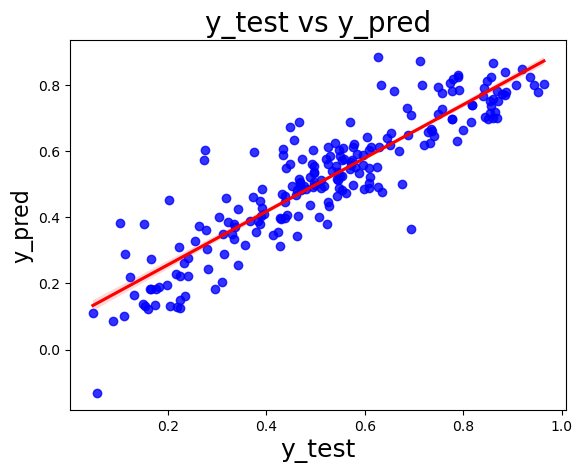

In [140]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Conclusion

Comparision between Training and Testing dataset for the final model (lr_5):
- Train dataset R^2          : 0.832
- Test dataset R^2           : 0.8075
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7983

Demand of bikes depend on below mentioned feature :
- year
- holiday
- temp
- july
- sep
- Light_snowrain
- Misty
- spring
- winter